# Data Processing For Neural Network Training

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    # The 5% of younger people experienced side effects and labeled as "1"
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The 5% of older people did not experience side effects and labeled as "0"
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger people did not experience side effects and labeled as "0"
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older people experienced side effects and labeled as "1"
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)



In [4]:
print(f"Train Samples: {train_samples}")
print(f"The length of train samples : {len(train_samples)}")
print(f"Train labels: {train_labels}")
print(f"The length of train labels : {len(train_labels)}")

Train Samples: [15, 81, 58, 87, 20, 93, 21, 72, 58, 69, 30, 89, 52, 66, 47, 72, 43, 67, 64, 74, 49, 71, 17, 98, 41, 87, 21, 75, 30, 86, 14, 84, 39, 78, 63, 97, 40, 89, 40, 65, 13, 91, 60, 87, 18, 100, 36, 97, 47, 74, 53, 71, 64, 92, 23, 70, 34, 94, 33, 82, 17, 79, 29, 73, 24, 68, 57, 75, 35, 98, 53, 68, 61, 100, 60, 92, 47, 66, 29, 98, 41, 71, 14, 81, 63, 93, 30, 71, 29, 98, 35, 91, 62, 68, 64, 99, 33, 98, 29, 84, 47, 70, 33, 66, 61, 74, 52, 99, 22, 93, 31, 65, 43, 74, 13, 74, 39, 98, 33, 93, 13, 88, 32, 74, 45, 73, 44, 89, 20, 65, 57, 71, 24, 85, 40, 77, 48, 92, 64, 68, 13, 84, 20, 71, 32, 65, 54, 97, 28, 90, 30, 95, 63, 75, 33, 82, 47, 91, 33, 81, 54, 72, 45, 71, 44, 73, 44, 98, 20, 66, 33, 97, 64, 84, 36, 71, 18, 93, 22, 86, 29, 65, 64, 97, 56, 100, 26, 91, 59, 67, 50, 78, 44, 82, 53, 99, 32, 86, 61, 96, 43, 75, 43, 65, 58, 84, 19, 95, 62, 95, 40, 67, 20, 83, 44, 87, 60, 83, 14, 92, 45, 85, 55, 76, 37, 72, 49, 79, 51, 77, 23, 95, 13, 66, 22, 98, 63, 74, 52, 65, 50, 67, 60, 88, 51, 8

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # Here reshape because the fit_transform function can not take the 1D array


# Simple tf.keras Sequential Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available:", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available: 1


In [9]:
model = Sequential([
    Dense(units=16,input_shape=(1,),  activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
189/189 - 1s - loss: 0.6848 - accuracy: 0.5730 - val_loss: 0.6720 - val_accuracy: 0.6095
Epoch 2/50
189/189 - 0s - loss: 0.6580 - accuracy: 0.6249 - val_loss: 0.6429 - val_accuracy: 0.6667
Epoch 3/50
189/189 - 0s - loss: 0.6297 - accuracy: 0.6635 - val_loss: 0.6130 - val_accuracy: 0.7000
Epoch 4/50
189/189 - 0s - loss: 0.6011 - accuracy: 0.7079 - val_loss: 0.5830 - val_accuracy: 0.7381
Epoch 5/50
189/189 - 0s - loss: 0.5723 - accuracy: 0.7386 - val_loss: 0.5527 - val_accuracy: 0.7667
Epoch 6/50
189/189 - 0s - loss: 0.5432 - accuracy: 0.7730 - val_loss: 0.5218 - val_accuracy: 0.8000
Epoch 7/50
189/189 - 0s - loss: 0.5141 - accuracy: 0.8042 - val_loss: 0.4912 - val_accuracy: 0.8333
Epoch 8/50
189/189 - 0s - loss: 0.4856 - accuracy: 0.8217 - val_loss: 0.4614 - val_accuracy: 0.8571
Epoch 9/50
189/189 - 0s - loss: 0.4581 - accuracy: 0.8503 - val_loss: 0.4325 - val_accuracy: 0.8952
Epoch 10/50
189/189 - 0s - loss: 0.4325 - accuracy: 0.8614 - val_loss: 0.4058 - val_accuracy: 0.9048

# Creating The Test Set

In [13]:
test_labels = []
test_samples = []

In [14]:
for i in range(10):
    # The 5% of younger people experienced side effects and labeled as "1"
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older people did not experience side effects and labeled as "0"
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The 95% of younger people did not experience side effects and labeled as "0"
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older people experienced side effects and labeled as "1"
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)



In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [16]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [17]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)  

In [18]:
# for i in predictions:
#     print(i)
print(predictions)

[[0.10783021 0.89216983]
 [0.04409957 0.9559004 ]
 [0.96424925 0.03575069]
 [0.96444315 0.03555682]
 [0.9492846  0.05071542]
 [0.7623316  0.2376684 ]
 [0.01049469 0.98950523]
 [0.7248898  0.2751102 ]
 [0.00948303 0.99051696]
 [0.01572289 0.9842771 ]
 [0.9642206  0.0357794 ]
 [0.30979773 0.6902023 ]
 [0.09795904 0.9020409 ]
 [0.08890148 0.91109854]
 [0.23247676 0.7675233 ]
 [0.7623316  0.2376684 ]
 [0.9530576  0.04694242]
 [0.04883724 0.95116276]
 [0.96149707 0.03850297]
 [0.39945146 0.60054857]
 [0.01421449 0.98578554]
 [0.08890148 0.91109854]
 [0.9601673  0.03983273]
 [0.10783021 0.89216983]
 [0.19924237 0.80075765]
 [0.30979773 0.6902023 ]
 [0.16970885 0.8302912 ]
 [0.8526421  0.14735787]
 [0.04883724 0.95116276]
 [0.9607043  0.03929562]
 [0.9632873  0.03671271]
 [0.39945146 0.60054857]
 [0.19924237 0.80075765]
 [0.026307   0.973693  ]
 [0.9373867  0.06261332]
 [0.04409957 0.9559004 ]
 [0.9632873  0.03671271]
 [0.01738852 0.9826115 ]
 [0.9632873  0.03671271]
 [0.96433204 0.03566796]


In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [22]:
# for i in rounded_predictions:
#     print(i)
print(rounded_predictions)

[1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 1]


# Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


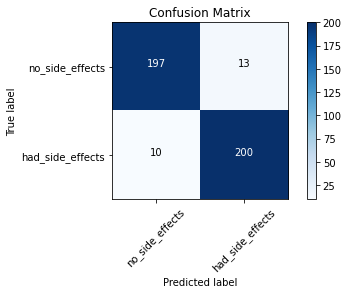

In [26]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Save Model

In [37]:
import os.path

if os.path.isfile('models/medical_model.h5') is False:
    os.mkdir('models')
    model.save('models/medical_model.h5')

In [38]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_model.h5')

In [41]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
new_model.get_weights()

[array([[-0.50004   ,  0.23037307,  0.20605709,  0.24803816,  0.3697549 ,
          0.4322594 , -0.43095183, -0.0791977 ,  0.22320576,  0.59446543,
          0.4552217 , -0.31532922,  0.26584825,  0.3288706 ,  0.34064355,
         -0.30437765]], dtype=float32),
 array([ 0.        , -0.09688613,  0.22719087,  0.17430374, -0.13962898,
        -0.16034637,  0.        ,  0.        , -0.09253351, -0.14644627,
        -0.16191609,  0.        , -0.10982698, -0.1146723 , -0.07280857,
         0.        ], dtype=float32),
 array([[ 2.83187956e-01,  2.95776039e-01, -2.85380274e-01,
          2.32165903e-01,  4.26700711e-02, -2.85642326e-01,
          3.27588469e-01,  3.24108303e-02,  1.55763060e-01,
          2.31173426e-01,  7.36628175e-02,  8.54215324e-02,
          2.58989364e-01, -3.52807313e-01,  1.04133070e-01,
          2.17263788e-01, -2.21161038e-01, -2.99108595e-01,
         -2.13282600e-01,  3.06066602e-01, -2.86159217e-01,
         -6.32062852e-02,  1.15356773e-01, -1.46750435e-01,
 

In [44]:
new_model.optimizer

# Model to JSON

In [45]:
json_model = model.to_json()
json_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [47]:
from tensorflow.keras.models import model_from_json
new_model_json = model_from_json(json_model)
new_model_json.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Saving And Loading The Weights Of The Model

In [49]:
if os.path.isfile('models/medical_model_weights.h5') is False:
#     os.mkdir('models')
    model.save_weights('models/medical_model_weights.h5')

In [50]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [52]:
model2.load_weights('models/medical_model_weights.h5')

In [53]:
model2.get_weights()

[array([[-0.50004   ,  0.23037307,  0.20605709,  0.24803816,  0.3697549 ,
          0.4322594 , -0.43095183, -0.0791977 ,  0.22320576,  0.59446543,
          0.4552217 , -0.31532922,  0.26584825,  0.3288706 ,  0.34064355,
         -0.30437765]], dtype=float32),
 array([ 0.        , -0.09688613,  0.22719087,  0.17430374, -0.13962898,
        -0.16034637,  0.        ,  0.        , -0.09253351, -0.14644627,
        -0.16191609,  0.        , -0.10982698, -0.1146723 , -0.07280857,
         0.        ], dtype=float32),
 array([[ 2.83187956e-01,  2.95776039e-01, -2.85380274e-01,
          2.32165903e-01,  4.26700711e-02, -2.85642326e-01,
          3.27588469e-01,  3.24108303e-02,  1.55763060e-01,
          2.31173426e-01,  7.36628175e-02,  8.54215324e-02,
          2.58989364e-01, -3.52807313e-01,  1.04133070e-01,
          2.17263788e-01, -2.21161038e-01, -2.99108595e-01,
         -2.13282600e-01,  3.06066602e-01, -2.86159217e-01,
         -6.32062852e-02,  1.15356773e-01, -1.46750435e-01,
 

# Thanks for clone this repository

This whole code is learned from deeplizard.com The course is Keras - Python Deep Learning Neural Network API

The link is https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL